In [5]:
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Defining Constants
api_key = "ZOC333QF0ZHXU5YD"
series = "TIME_SERIES_DAILY"
request_url = "https://www.alphavantage.co/query"
d_address = 'Data/Deaths.csv'
c_address = 'Data/Confirmed.csv'
palette = ['r','g','y','b']

### Fetching Stock Datasets from Alphavantage

In [7]:
def fetch_stock_values(symbol):
    query_params = {
        'function' : series,
        'symbol' : symbol,
        'apikey': api_key
    }
    headers = {
        'User-Agent': 'XY',
        'Content-type': 'application/json'
    }
    response = requests.get(request_url, headers=headers, params=query_params)
    return response.text if response.status_code == 200 else "Something went wrong"

#### 1. SPDR S&P 500 ETF Trust

In [8]:
spy_json = json.loads(fetch_stock_values(symbol='spy'))
sdf = pd.DataFrame(spy_json['Time Series (Daily)']).astype(float)
spy_df = sdf.drop(['1. open','4. close','5. volume'],axis=0)
spy = spy_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 2. Zoom Video Communications Inc

In [9]:
zm_json = json.loads(fetch_stock_values(symbol='ZM'))
zdf = pd.DataFrame(zm_json['Time Series (Daily)']).astype(float)
zm_df = zdf.drop(['1. open','4. close','5. volume'],axis=0)
zm = zm_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 3. Delta Air Lines, Inc

In [10]:
dal_json = json.loads(fetch_stock_values(symbol='DAL'))
ddf = pd.DataFrame(dal_json['Time Series (Daily)']).astype(float)
dal_df = ddf.drop(['1. open','4. close','5. volume'],axis=0)
dal = dal_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 4. Annaly Capital Management, Inc

In [11]:
nly_json = json.loads(fetch_stock_values(symbol='NLY'))
ndf = pd.DataFrame(nly_json['Time Series (Daily)']).astype(float)
nly_df = ndf.drop(['1. open','4. close','5. volume'],axis=0)
nly = nly_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 5. GOLD

In [12]:
gld_json = json.loads(fetch_stock_values(symbol='GOLD'))
gdf = pd.DataFrame(gld_json['Time Series (Daily)']).astype(float)
gld_df = gdf.drop(['1. open','4. close','5. volume'],axis=0)
gld = gld_df.rename({'2. high' : 'high', '3. low' : 'low'})

### Transposing the Stock Datasets

In [13]:
spy_tp_df = spy.T
zm_tp_df = zm.T
dal_tp_df = dal.T
nly_tp_df = nly.T
gld_tp_df = gld.T

In [14]:
# Creating Date as default index
spy_tp_df.rename_axis('Date', inplace=True)

# Printing one Datasets
spy_tp_df.head(5)

,high,low
Date,,
2022-04-25,428.6900,418.84
2022-04-22,438.0825,425.44
2022-04-21,450.0100,437.10
2022-04-20,447.5700,443.48
2022-04-19,445.8000,437.68


### Importing Covid Deaths Dataset

In [15]:
# Importing COVID Deaths data from CSV
deaths_data = pd.read_csv(d_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
deaths_data['Date'] = pd.to_datetime(deaths_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Deaths data such that value is at position 1.
deaths_data['Date'] = deaths_data['Date'].values[::-1].astype(str)
deaths_data['Deaths'] = deaths_data['Deaths'].values[::-1]

# Assigning Date as default index
deaths_data.set_index('Date', inplace=True)

# Number of Deaths is in multiples of 10k we will have to divide it such that the visuals can correlate each other.
deaths_data['Deaths'] = deaths_data['Deaths'].div(100)

# Printing Dataframe
deaths_data

,Deaths
Date,
2022-04-25,388.85
2022-04-24,388.78
2022-04-23,388.53
2022-04-22,388.01
2022-04-21,386.96
...,...
2021-12-05,298.96
2021-12-04,298.89
2021-12-03,298.80


### Importing covid Confirmed Dataset

In [16]:
# Importing COVID confirmed cases data from CSV
confirmed_data = pd.read_csv(c_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
confirmed_data['Date'] = pd.to_datetime(confirmed_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Confirmed cases data such that value is at position 1.
confirmed_data['Date'] = confirmed_data['Date'].values[::-1].astype(str)
confirmed_data['Confirmed'] = confirmed_data['Confirmed'].values[::-1]

# Assigning Date as default index
confirmed_data.set_index('Date', inplace=True)

# Number of Confirmed cases is in multiples of 100k we will have to divide it such that the visuals can correlate each other.
confirmed_data['Confirmed'] = confirmed_data['Confirmed'].div(10000)

# Printing Dataframe
confirmed_data

,Confirmed
Date,
2022-04-24,371.6970
2022-04-23,371.2313
2022-04-22,370.7562
2022-04-21,369.0272
2022-04-20,367.9757
...,...
2021-12-05,181.3563
2021-12-04,181.1253
2021-12-03,180.8631


### Join Datasets of Covid Deaths and Covid Confirmed Cases

In [17]:
# Joining deaths with first stock
deaths_vs_spy = spy_tp_df.join(deaths_data, how='outer')

# Joining deaths with second stock
deaths_vs_zm = zm_tp_df.join(deaths_data, how='outer')

# Joining deaths with third stock
deaths_vs_dal = dal_tp_df.join(deaths_data, how='outer')

# Joining deaths with fourth stock
deaths_vs_nly = nly_tp_df.join(deaths_data, how='outer')

# Joining deaths with five stock
deaths_vs_gld = gld_tp_df.join(deaths_data, how='outer')

In [18]:
# Joining Confirmed cases with first stock
confirmed_vs_spy = spy_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with second stock
confirmed_vs_zm = zm_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with third stock
confirmed_vs_dal = dal_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with fourth stock
confirmed_vs_nly = nly_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with five stock
confirmed_vs_gld = gld_tp_df.join(confirmed_data, how='outer')

In [19]:
# Printing deaths vs stocks merged Datasets
deaths_vs_spy

,high,low,Deaths
Date,,,
2021-12-01,464.6700,450.29,298.37
2021-12-02,459.0700,450.31,298.58
2021-12-03,460.3000,448.92,298.80
2021-12-04,NaN,NaN,298.89
2021-12-05,NaN,NaN,298.96
...,...,...,...
2022-04-21,450.0100,437.10,386.96
2022-04-22,438.0825,425.44,388.01
2022-04-23,NaN,NaN,388.53


In [20]:
# Printing confirmed cases vs stocks merged Datasets
confirmed_vs_spy

,high,low,Confirmed
Date,,,
2021-12-01,464.6700,450.29,180.1609
2021-12-02,459.0700,450.31,180.4994
2021-12-03,460.3000,448.92,180.8631
2021-12-04,NaN,NaN,181.1253
2021-12-05,NaN,NaN,181.3563
...,...,...,...
2022-04-21,450.0100,437.10,369.0272
2022-04-22,438.0825,425.44,370.7562
2022-04-23,NaN,NaN,371.2313


## Visualizations

### SPDR S&P 500 ETF Trust vs Deaths vs Confirmed cases

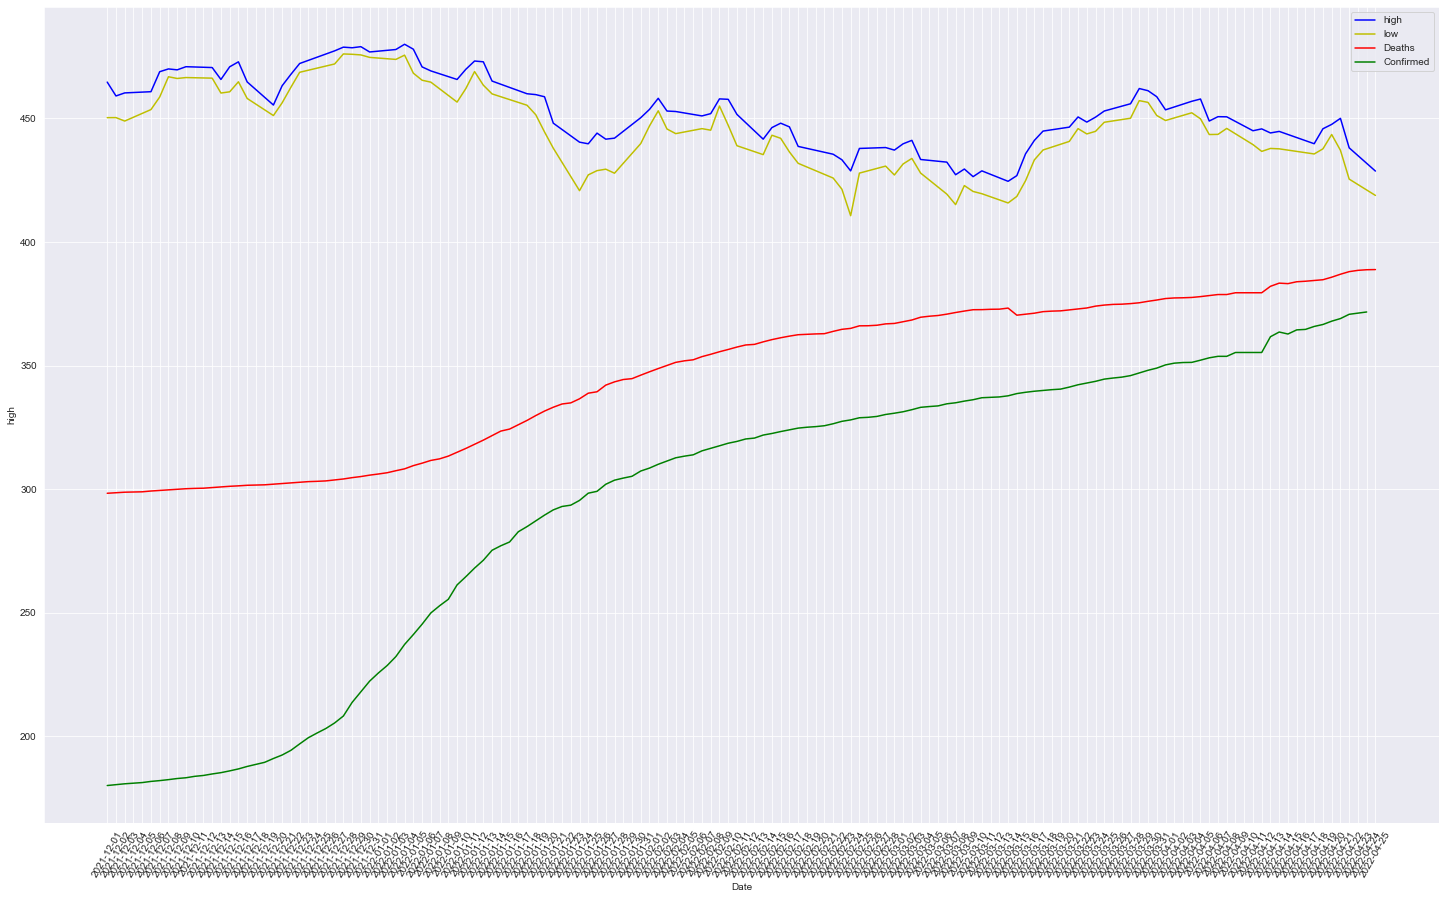

In [21]:
fig1, ax1 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_spy,
    x=deaths_vs_spy.index.astype(str),
    y=deaths_vs_spy['high'],
    color='b',
    label='high',
    ax=ax1
)
sns.lineplot(
    data=deaths_vs_spy,
    x=deaths_vs_spy.index.astype(str),
    y=deaths_vs_spy['low'],
    color='y',
    label='low',
    ax=ax1
)
sns.lineplot(
    data=deaths_vs_spy,
    x=deaths_vs_spy.index.astype(str),
    y=deaths_vs_spy['Deaths'],
    color='r',
    label='Deaths',
    ax=ax1)
sns.lineplot(
    data=confirmed_vs_spy,
    x=confirmed_vs_spy.index.astype(str),
    y=confirmed_vs_spy['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax1
)
ax1.tick_params(axis='x', rotation=60)

### Zoom Video Communications Inc vs Deaths vs Confirmed cases

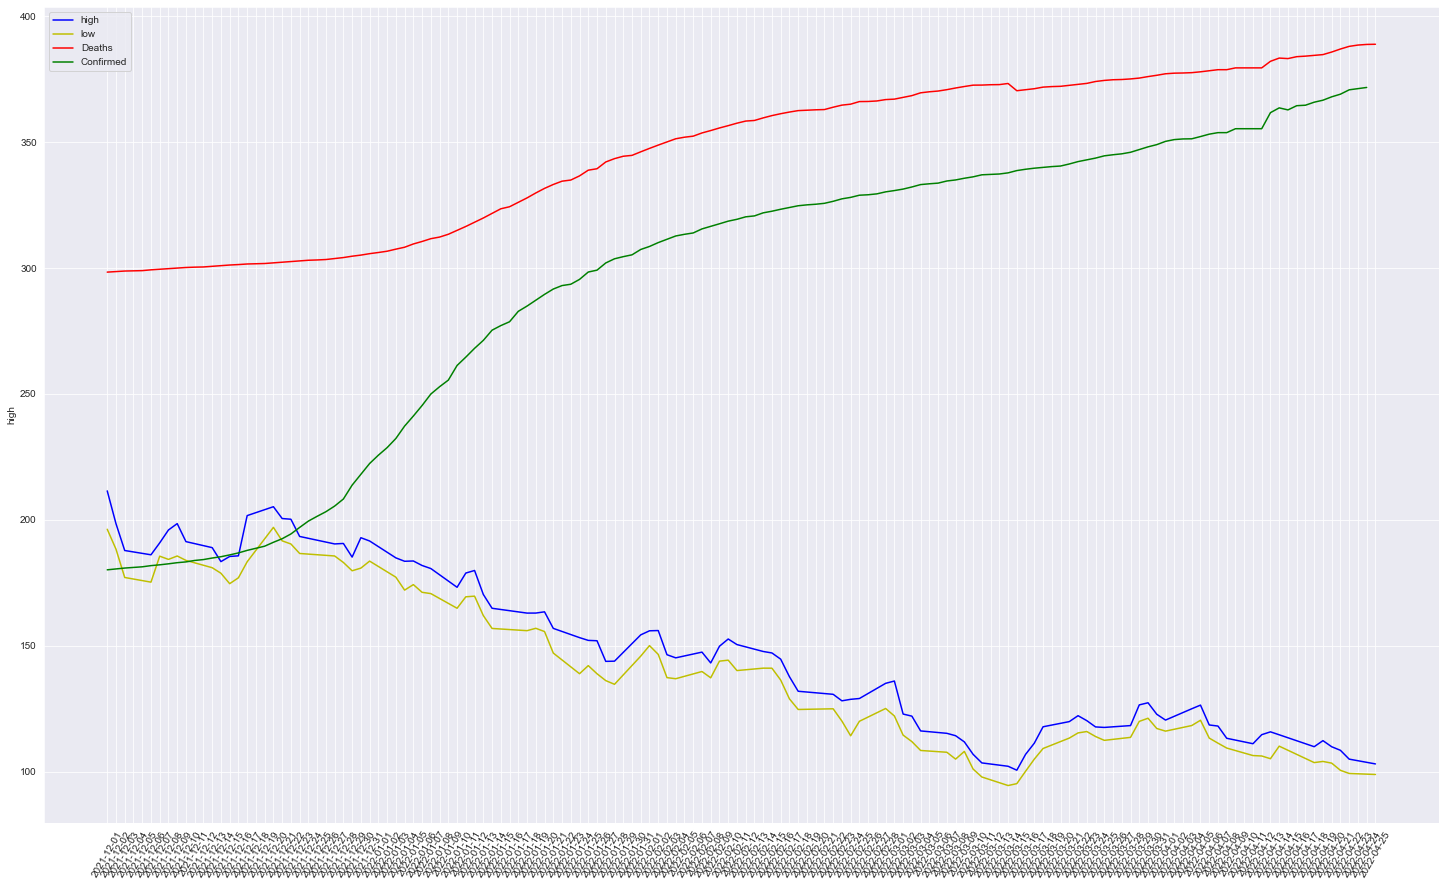

In [22]:
fig2, ax2 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_zm,
    x=deaths_vs_zm.index.astype(str),
    y=deaths_vs_zm['high'],
    color='b',
    label='high',
    ax=ax2
)
sns.lineplot(
    data=deaths_vs_zm,
    x=deaths_vs_zm.index.astype(str),
    y=deaths_vs_zm['low'],
    color='y',
    label='low',
    ax=ax2
)
sns.lineplot(
    data=deaths_vs_zm,
    x=deaths_vs_zm.index.astype(str),
    y=deaths_vs_zm['Deaths'],
    color='r',
    label='Deaths',
    ax=ax2
)
sns.lineplot(
    data=confirmed_vs_zm,
    x=confirmed_vs_zm.index.astype(str),
    y=confirmed_vs_zm['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax2
)
ax2.tick_params(axis='x', rotation=60)

### Delta Air Lines, Inc vs Deaths vs Confirmed cases

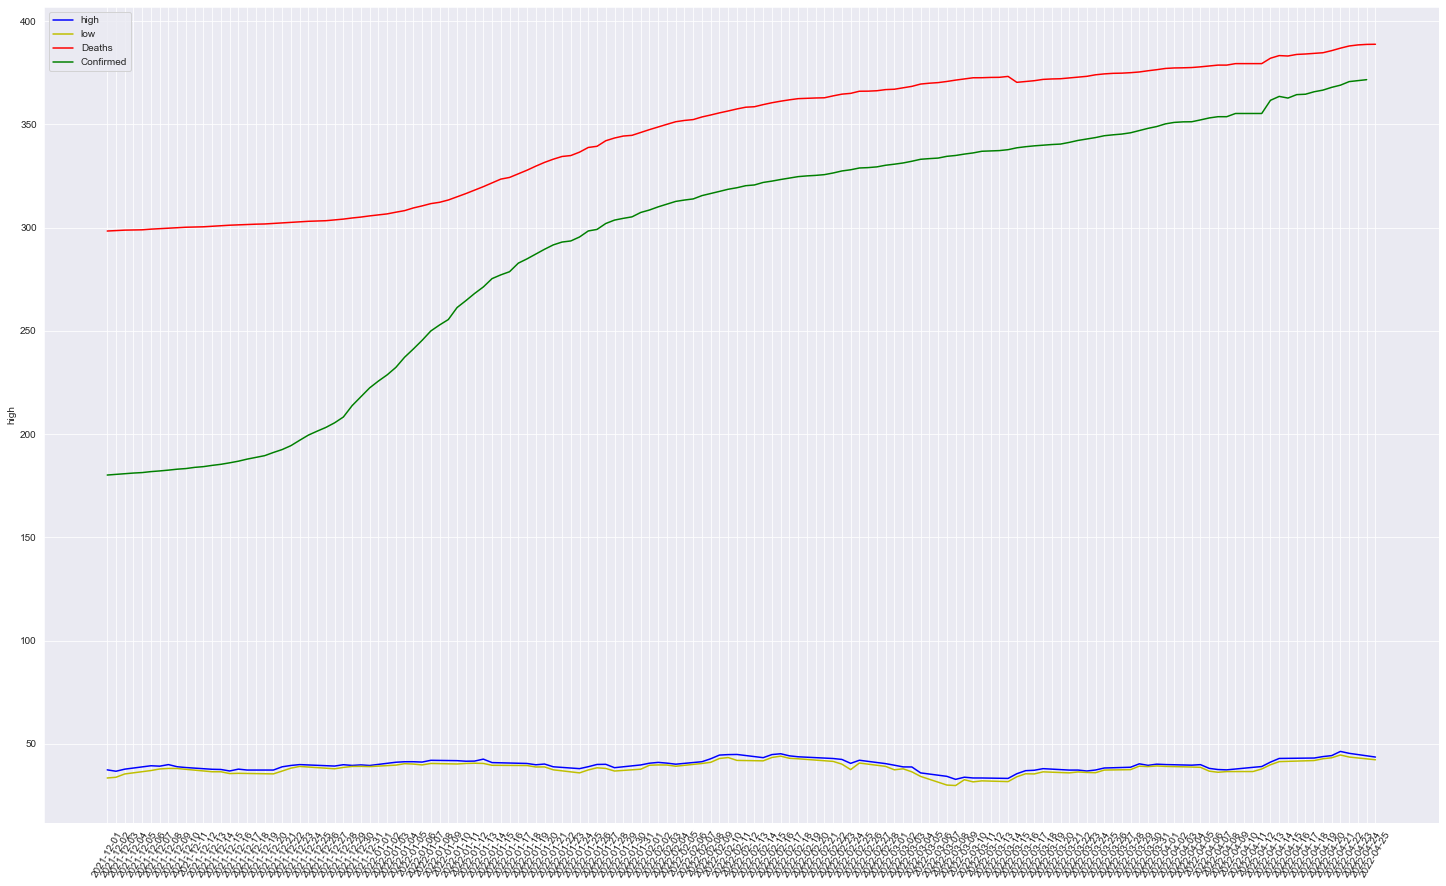

In [23]:
fig3, ax3 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_dal,
    x=deaths_vs_dal.index.astype(str),
    y=deaths_vs_dal['high'],
    color='b',
    label='high',
    ax=ax3
)
sns.lineplot(
    data=deaths_vs_dal,
    x=deaths_vs_dal.index.astype(str),
    y=deaths_vs_dal['low'],
    color='y',
    label='low',
    ax=ax3
)
sns.lineplot(
    data=deaths_vs_dal,
    x=deaths_vs_dal.index.astype(str),
    y=deaths_vs_dal['Deaths'],
    color='r',
    label='Deaths',
    ax=ax3
)
sns.lineplot(
    data=confirmed_vs_dal,
    x=confirmed_vs_dal.index.astype(str),
    y=confirmed_vs_dal['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax3
)
ax3.tick_params(axis='x', rotation=60)

### Annaly Capital Management, Inc vs Deaths vs Confirmed cases

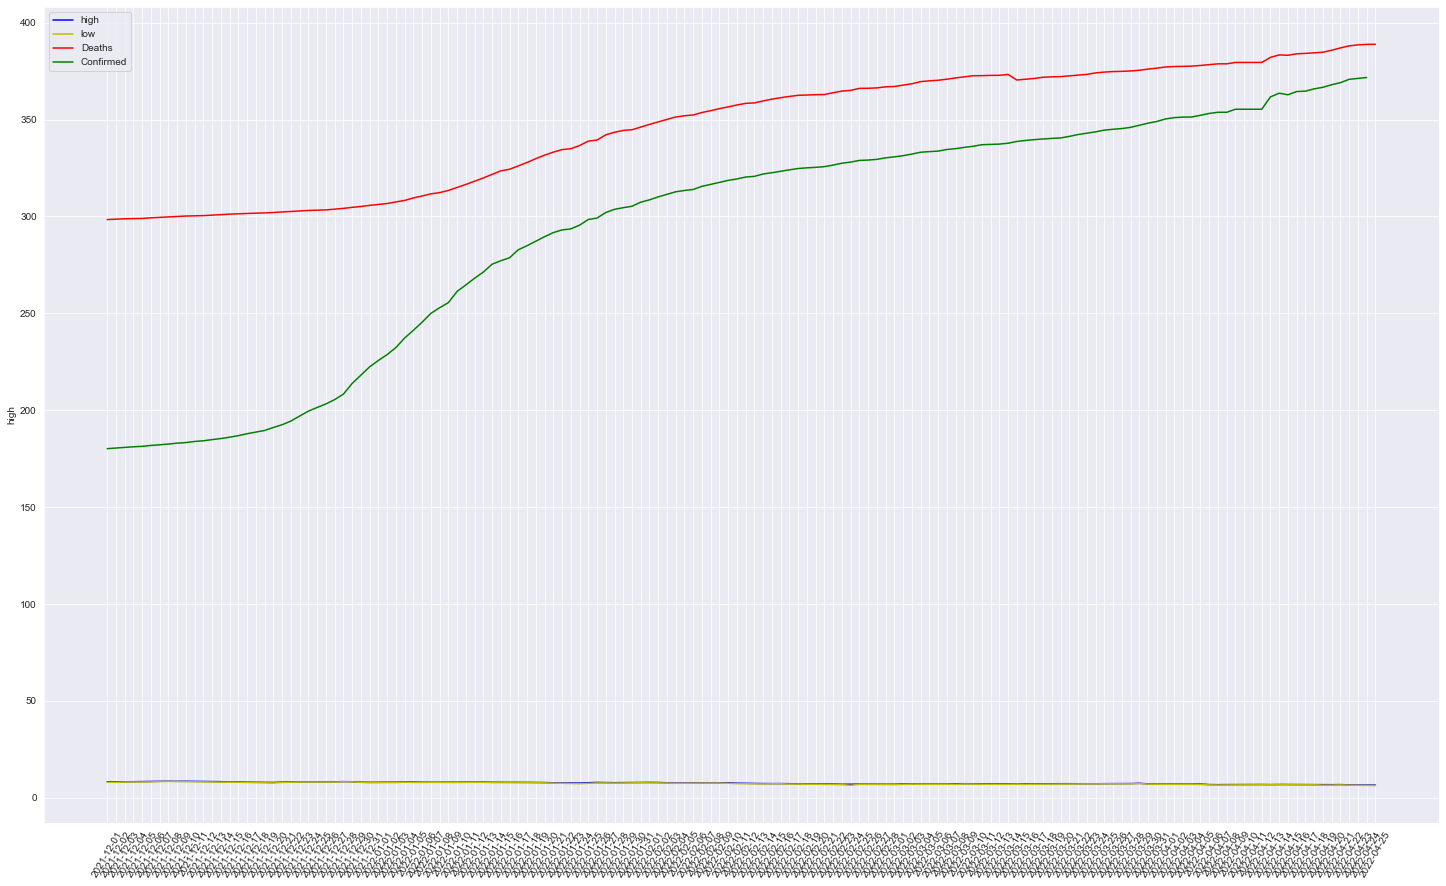

In [24]:
fig4, ax4 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_nly,
    x=deaths_vs_nly.index.astype(str),
    y=deaths_vs_nly['high'],
    color='b',
    label='high',
    ax=ax4
)
sns.lineplot(
    data=deaths_vs_nly,
    x=deaths_vs_nly.index.astype(str),
    y=deaths_vs_nly['low'],
    color='y',
    label='low',
    ax=ax4
)
sns.lineplot(
    data=deaths_vs_nly,
    x=deaths_vs_nly.index.astype(str),
    y=deaths_vs_nly['Deaths'],
    color='r',
    label='Deaths',
    ax=ax4
)
sns.lineplot(
    data=confirmed_vs_nly,
    x=confirmed_vs_nly.index.astype(str),
    y=confirmed_vs_nly['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax4
)
ax4.tick_params(axis='x', rotation=60)

### GOLD vs Deaths vs Confirmed cases

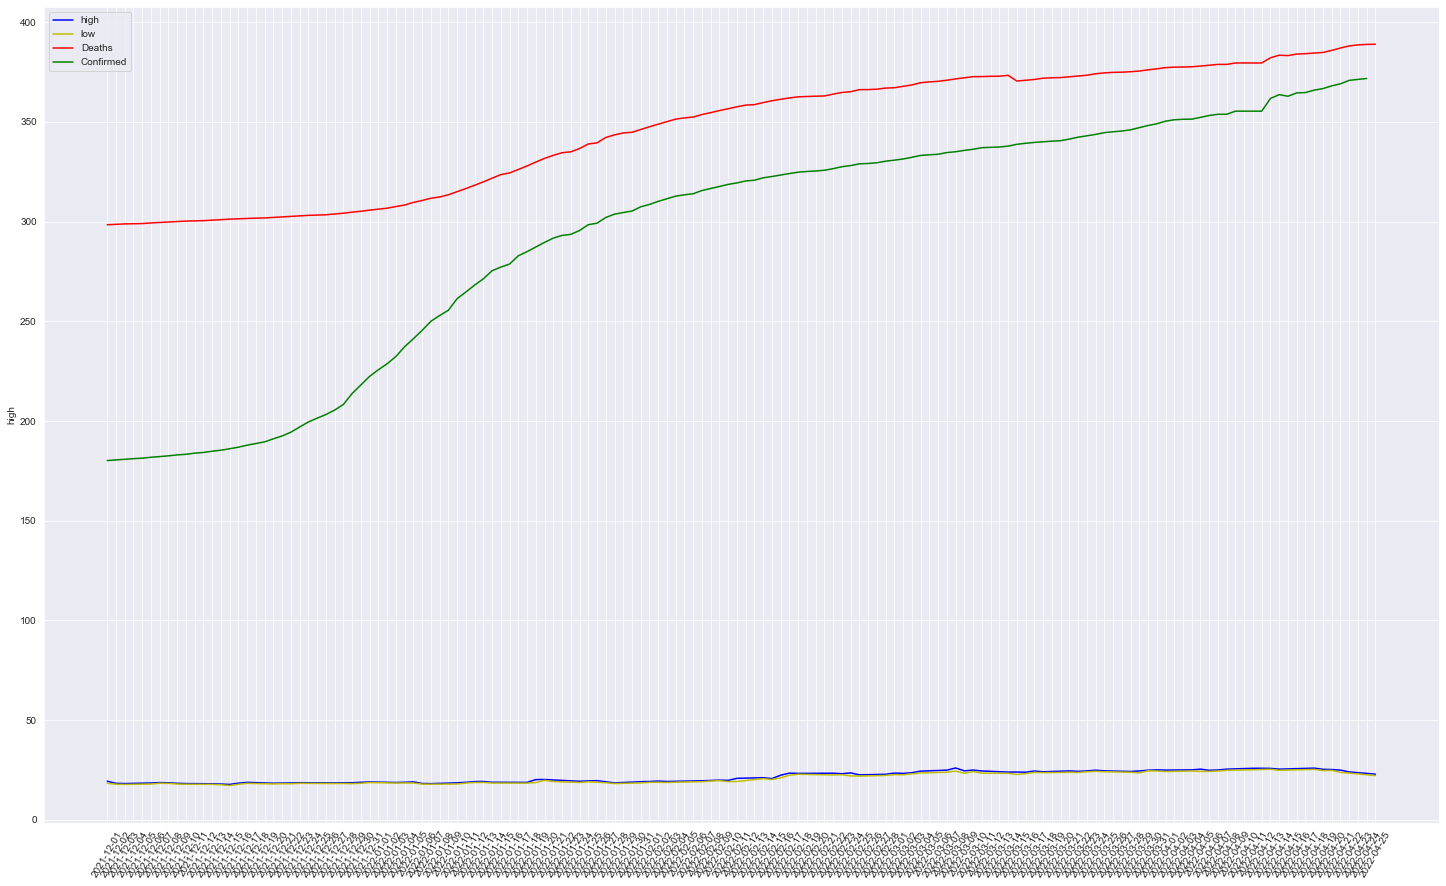

In [25]:
fig5, ax5 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_gld,
    x=deaths_vs_gld.index.astype(str),
    y=deaths_vs_gld['high'],
    color='b',
    label='high',
    ax=ax5
)
sns.lineplot(
    data=deaths_vs_gld,
    x=deaths_vs_gld.index.astype(str),
    y=deaths_vs_gld['low'],
    color='y',
    label='low',
    ax=ax5
)
sns.lineplot(
    data=deaths_vs_gld,
    x=deaths_vs_gld.index.astype(str),
    y=deaths_vs_gld['Deaths'],
    color='r',
    label='Deaths',
    ax=ax5
)
sns.lineplot(
    data=confirmed_vs_gld,
    x=confirmed_vs_gld.index.astype(str),
    y=confirmed_vs_gld['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax5
)
ax5.tick_params(axis='x', rotation=60)

In [46]:
# Defining Constants
api_key = "ZOC333QF0ZHXU5YD"
series = "TIME_SERIES_DAILY"
request_url = "https://www.alphavantage.co/query"
d_address = 'Data/Deaths.csv'
c_address = 'Data/Confirmed.csv'
palette = ['r','g','y','b']

### Fetching Stock Datasets from Alphavantage

In [47]:
def fetch_stock_values(symbol):
    query_params = {
        'function' : series,
        'symbol' : symbol,
        'apikey': api_key
    }
    headers = {
        'User-Agent': 'XY',
        'Content-type': 'application/json'
    }
    response = requests.get(request_url, headers=headers, params=query_params)
    return response.text if response.status_code == 200 else "Something went wrong"

#### 1. SPDR S&P 500 ETF Trust

In [48]:
spy_json = json.loads(fetch_stock_values(symbol='spy'))
sdf = pd.DataFrame(spy_json['Time Series (Daily)']).astype(float)
spy_df = sdf.drop(['1. open','4. close','5. volume'],axis=0)
spy = spy_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 2. Zoom Video Communications Inc

In [49]:
zm_json = json.loads(fetch_stock_values(symbol='ZM'))
zdf = pd.DataFrame(zm_json['Time Series (Daily)']).astype(float)
zm_df = zdf.drop(['1. open','4. close','5. volume'],axis=0)
zm = zm_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 3. Delta Air Lines, Inc

In [50]:
dal_json = json.loads(fetch_stock_values(symbol='DAL'))
ddf = pd.DataFrame(dal_json['Time Series (Daily)']).astype(float)
dal_df = ddf.drop(['1. open','4. close','5. volume'],axis=0)
dal = dal_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 4. Annaly Capital Management, Inc

In [51]:
nly_json = json.loads(fetch_stock_values(symbol='NLY'))
ndf = pd.DataFrame(nly_json['Time Series (Daily)']).astype(float)
nly_df = ndf.drop(['1. open','4. close','5. volume'],axis=0)
nly = nly_df.rename({'2. high' : 'high', '3. low' : 'low'})

#### 5. GOLD

In [52]:
gld_json = json.loads(fetch_stock_values(symbol='GOLD'))
gdf = pd.DataFrame(gld_json['Time Series (Daily)']).astype(float)
gld_df = gdf.drop(['1. open','4. close','5. volume'],axis=0)
gld = gld_df.rename({'2. high' : 'high', '3. low' : 'low'})

### Transposing the Stock Datasets

In [53]:
spy_tp_df = spy.T
zm_tp_df = zm.T
dal_tp_df = dal.T
nly_tp_df = nly.T
gld_tp_df = gld.T

In [54]:
# Creating Date as default index
spy_tp_df.rename_axis('Date', inplace=True)

# Printing one Datasets
spy_tp_df.head(5)

,high,low
Date,,
2022-04-25,428.6900,418.84
2022-04-22,438.0825,425.44
2022-04-21,450.0100,437.10
2022-04-20,447.5700,443.48
2022-04-19,445.8000,437.68


### Importing Covid Deaths Dataset

In [55]:
# Importing COVID Deaths data from CSV
deaths_data = pd.read_csv(d_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
deaths_data['Date'] = pd.to_datetime(deaths_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Deaths data such that value is at position 1.
deaths_data['Date'] = deaths_data['Date'].values[::-1].astype(str)
deaths_data['Deaths'] = deaths_data['Deaths'].values[::-1]

# Assigning Date as default index
deaths_data.set_index('Date', inplace=True)

# Number of Deaths is in multiples of 10k we will have to divide it such that the visuals can correlate each other.
deaths_data['Deaths'] = deaths_data['Deaths'].div(100)

# Printing Dataframe
deaths_data

,Deaths
Date,
2022-04-25,388.85
2022-04-24,388.78
2022-04-23,388.53
2022-04-22,388.01
2022-04-21,386.96
...,...
2021-12-05,298.96
2021-12-04,298.89
2021-12-03,298.80


### Importing covid Confirmed Dataset

In [56]:
# Importing COVID confirmed cases data from CSV
confirmed_data = pd.read_csv(c_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
confirmed_data['Date'] = pd.to_datetime(confirmed_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Confirmed cases data such that value is at position 1.
confirmed_data['Date'] = confirmed_data['Date'].values[::-1].astype(str)
confirmed_data['Confirmed'] = confirmed_data['Confirmed'].values[::-1]

# Assigning Date as default index
confirmed_data.set_index('Date', inplace=True)

# Number of Confirmed cases is in multiples of 100k we will have to divide it such that the visuals can correlate each other.
confirmed_data['Confirmed'] = confirmed_data['Confirmed'].div(10000)

# Printing Dataframe
confirmed_data

,Confirmed
Date,
2022-04-24,371.6970
2022-04-23,371.2313
2022-04-22,370.7562
2022-04-21,369.0272
2022-04-20,367.9757
...,...
2021-12-05,181.3563
2021-12-04,181.1253
2021-12-03,180.8631


### Join Datasets of Covid Deaths and Covid Confirmed Cases

In [57]:
# Joining deaths with first stock
deaths_vs_spy = spy_tp_df.join(deaths_data, how='outer')

# Joining deaths with second stock
deaths_vs_zm = zm_tp_df.join(deaths_data, how='outer')

# Joining deaths with third stock
deaths_vs_dal = dal_tp_df.join(deaths_data, how='outer')

# Joining deaths with fourth stock
deaths_vs_nly = nly_tp_df.join(deaths_data, how='outer')

# Joining deaths with five stock
deaths_vs_gld = gld_tp_df.join(deaths_data, how='outer')

In [58]:
# Joining Confirmed cases with first stock
confirmed_vs_spy = spy_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with second stock
confirmed_vs_zm = zm_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with third stock
confirmed_vs_dal = dal_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with fourth stock
confirmed_vs_nly = nly_tp_df.join(confirmed_data, how='outer')

# Joining Confirmed cases with five stock
confirmed_vs_gld = gld_tp_df.join(confirmed_data, how='outer')

In [59]:
# Printing deaths vs stocks merged Datasets
deaths_vs_spy

,high,low,Deaths
Date,,,
2021-12-01,464.6700,450.29,298.37
2021-12-02,459.0700,450.31,298.58
2021-12-03,460.3000,448.92,298.80
2021-12-04,NaN,NaN,298.89
2021-12-05,NaN,NaN,298.96
...,...,...,...
2022-04-21,450.0100,437.10,386.96
2022-04-22,438.0825,425.44,388.01
2022-04-23,NaN,NaN,388.53


In [60]:
# Printing confirmed cases vs stocks merged Datasets
confirmed_vs_spy

,high,low,Confirmed
Date,,,
2021-12-01,464.6700,450.29,180.1609
2021-12-02,459.0700,450.31,180.4994
2021-12-03,460.3000,448.92,180.8631
2021-12-04,NaN,NaN,181.1253
2021-12-05,NaN,NaN,181.3563
...,...,...,...
2022-04-21,450.0100,437.10,369.0272
2022-04-22,438.0825,425.44,370.7562
2022-04-23,NaN,NaN,371.2313


## Visualizations

### SPDR S&P 500 ETF Trust vs Deaths vs Confirmed cases

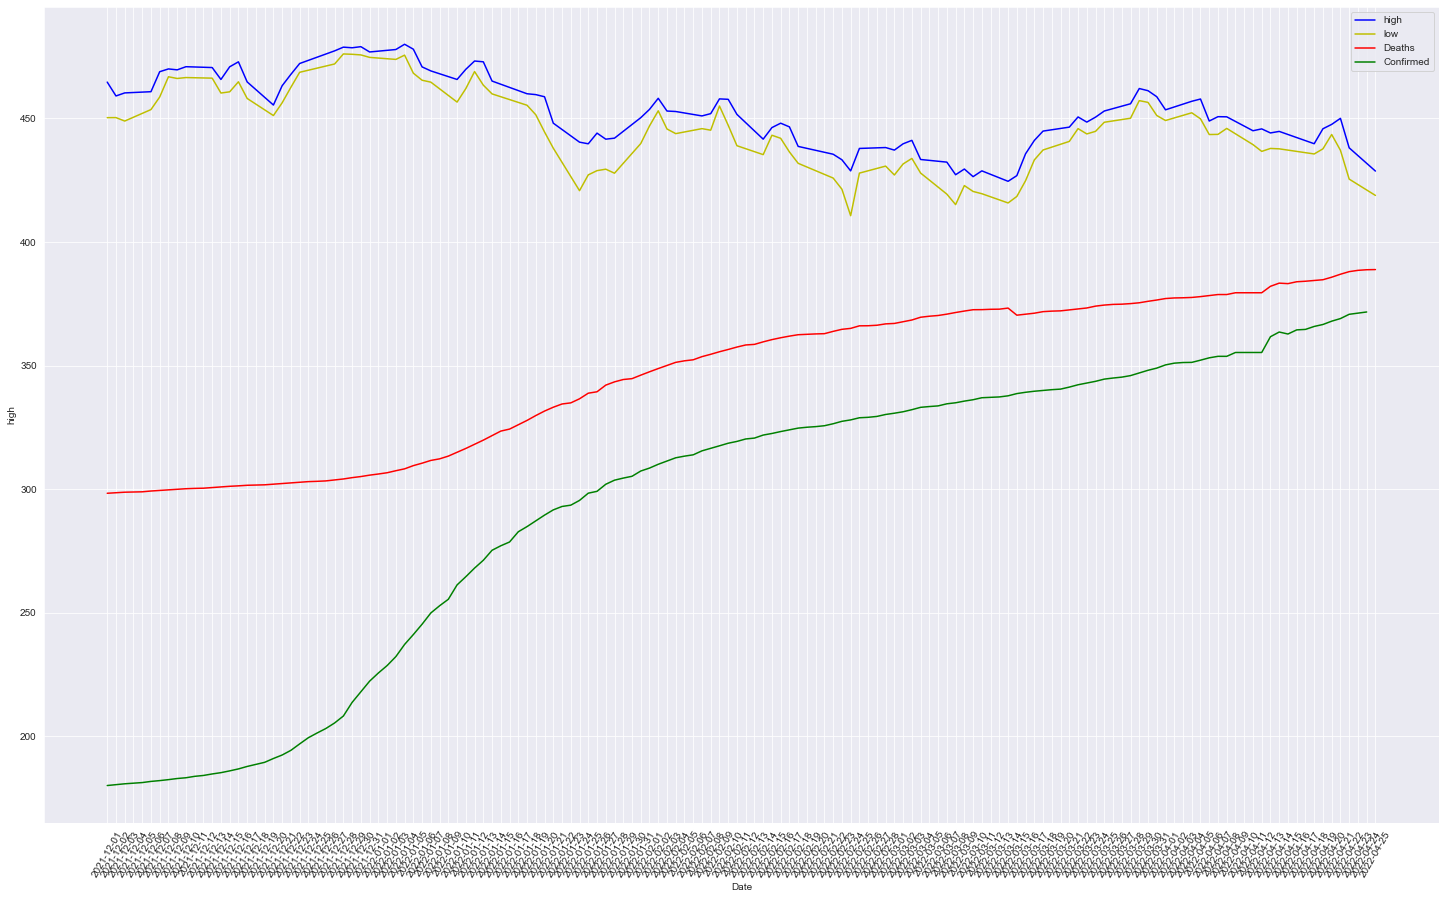

In [61]:
fig1, ax1 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_spy,
    x=deaths_vs_spy.index.astype(str),
    y=deaths_vs_spy['high'],
    color='b',
    label='high',
    ax=ax1
)
sns.lineplot(
    data=deaths_vs_spy,
    x=deaths_vs_spy.index.astype(str),
    y=deaths_vs_spy['low'],
    color='y',
    label='low',
    ax=ax1
)
sns.lineplot(
    data=deaths_vs_spy,
    x=deaths_vs_spy.index.astype(str),
    y=deaths_vs_spy['Deaths'],
    color='r',
    label='Deaths',
    ax=ax1)
sns.lineplot(
    data=confirmed_vs_spy,
    x=confirmed_vs_spy.index.astype(str),
    y=confirmed_vs_spy['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax1
)
ax1.tick_params(axis='x', rotation=60)

### Zoom Video Communications Inc vs Deaths vs Confirmed cases

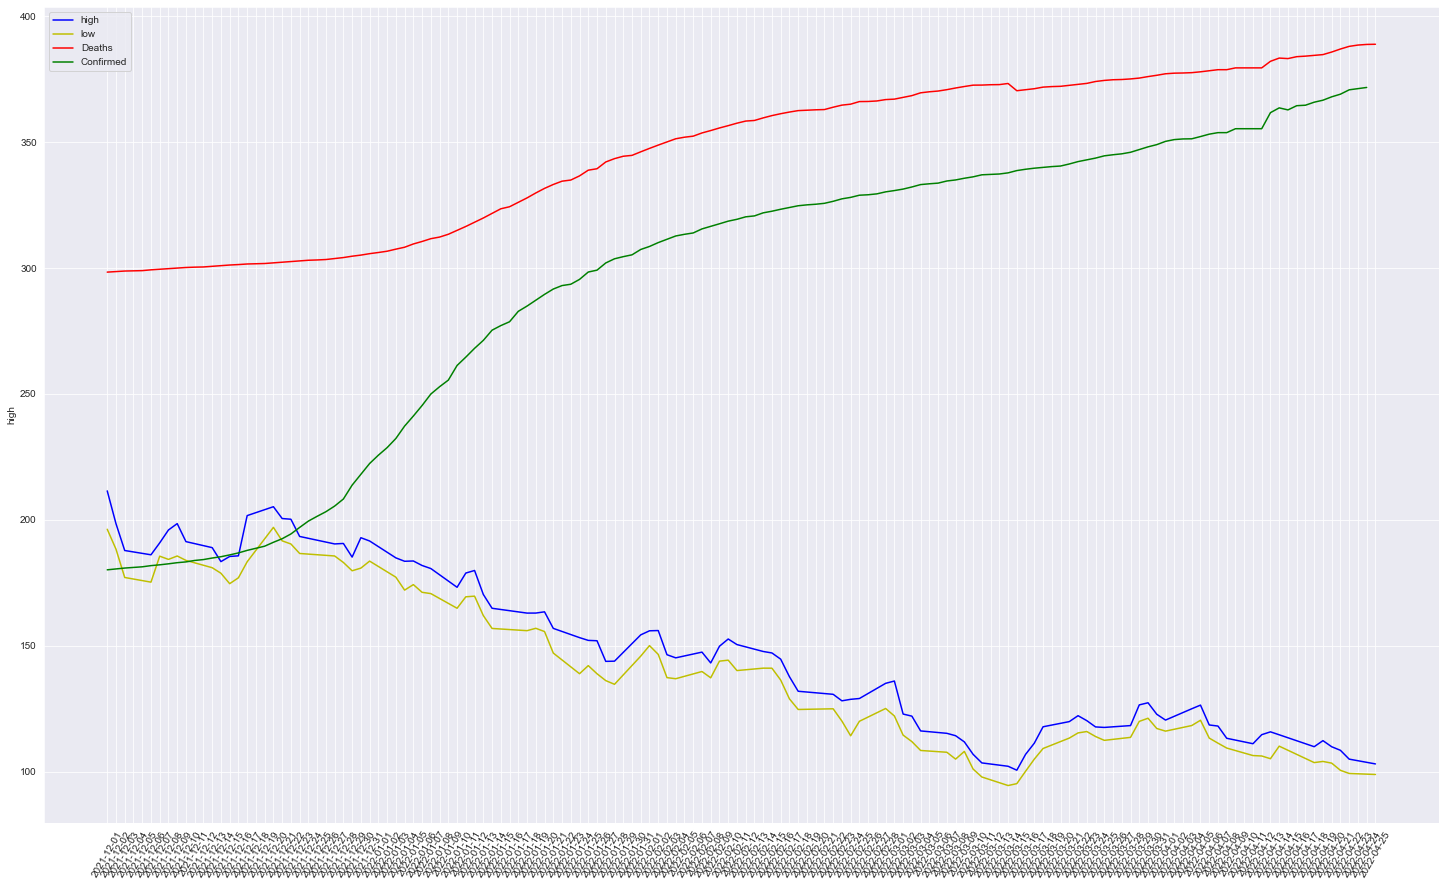

In [62]:
fig2, ax2 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_zm,
    x=deaths_vs_zm.index.astype(str),
    y=deaths_vs_zm['high'],
    color='b',
    label='high',
    ax=ax2
)
sns.lineplot(
    data=deaths_vs_zm,
    x=deaths_vs_zm.index.astype(str),
    y=deaths_vs_zm['low'],
    color='y',
    label='low',
    ax=ax2
)
sns.lineplot(
    data=deaths_vs_zm,
    x=deaths_vs_zm.index.astype(str),
    y=deaths_vs_zm['Deaths'],
    color='r',
    label='Deaths',
    ax=ax2
)
sns.lineplot(
    data=confirmed_vs_zm,
    x=confirmed_vs_zm.index.astype(str),
    y=confirmed_vs_zm['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax2
)
ax2.tick_params(axis='x', rotation=60)

### Delta Air Lines, Inc vs Deaths vs Confirmed cases

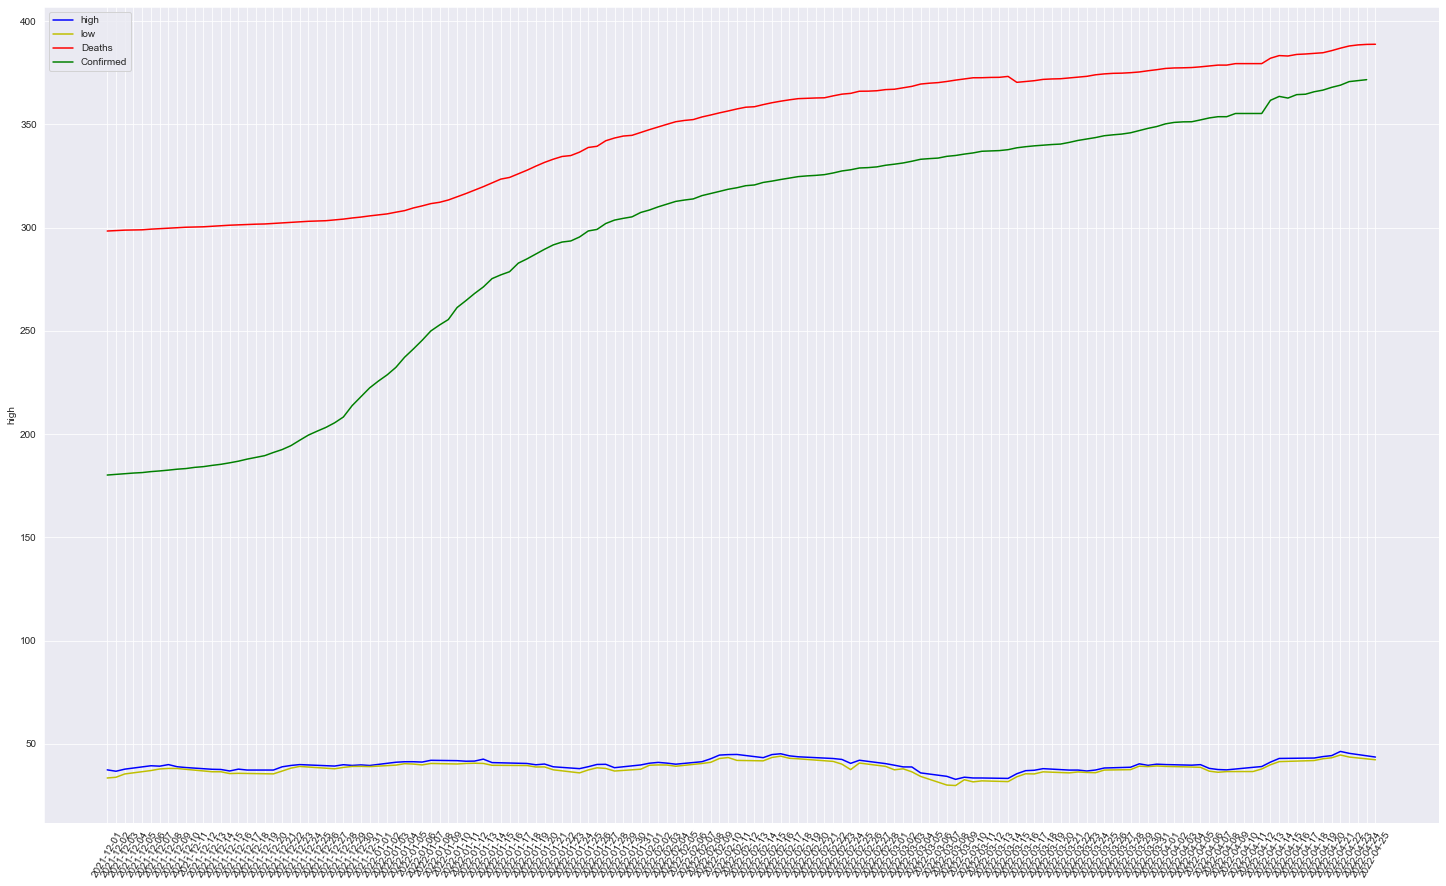

In [63]:
fig3, ax3 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_dal,
    x=deaths_vs_dal.index.astype(str),
    y=deaths_vs_dal['high'],
    color='b',
    label='high',
    ax=ax3
)
sns.lineplot(
    data=deaths_vs_dal,
    x=deaths_vs_dal.index.astype(str),
    y=deaths_vs_dal['low'],
    color='y',
    label='low',
    ax=ax3
)
sns.lineplot(
    data=deaths_vs_dal,
    x=deaths_vs_dal.index.astype(str),
    y=deaths_vs_dal['Deaths'],
    color='r',
    label='Deaths',
    ax=ax3
)
sns.lineplot(
    data=confirmed_vs_dal,
    x=confirmed_vs_dal.index.astype(str),
    y=confirmed_vs_dal['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax3
)
ax3.tick_params(axis='x', rotation=60)

### Annaly Capital Management, Inc vs Deaths vs Confirmed cases

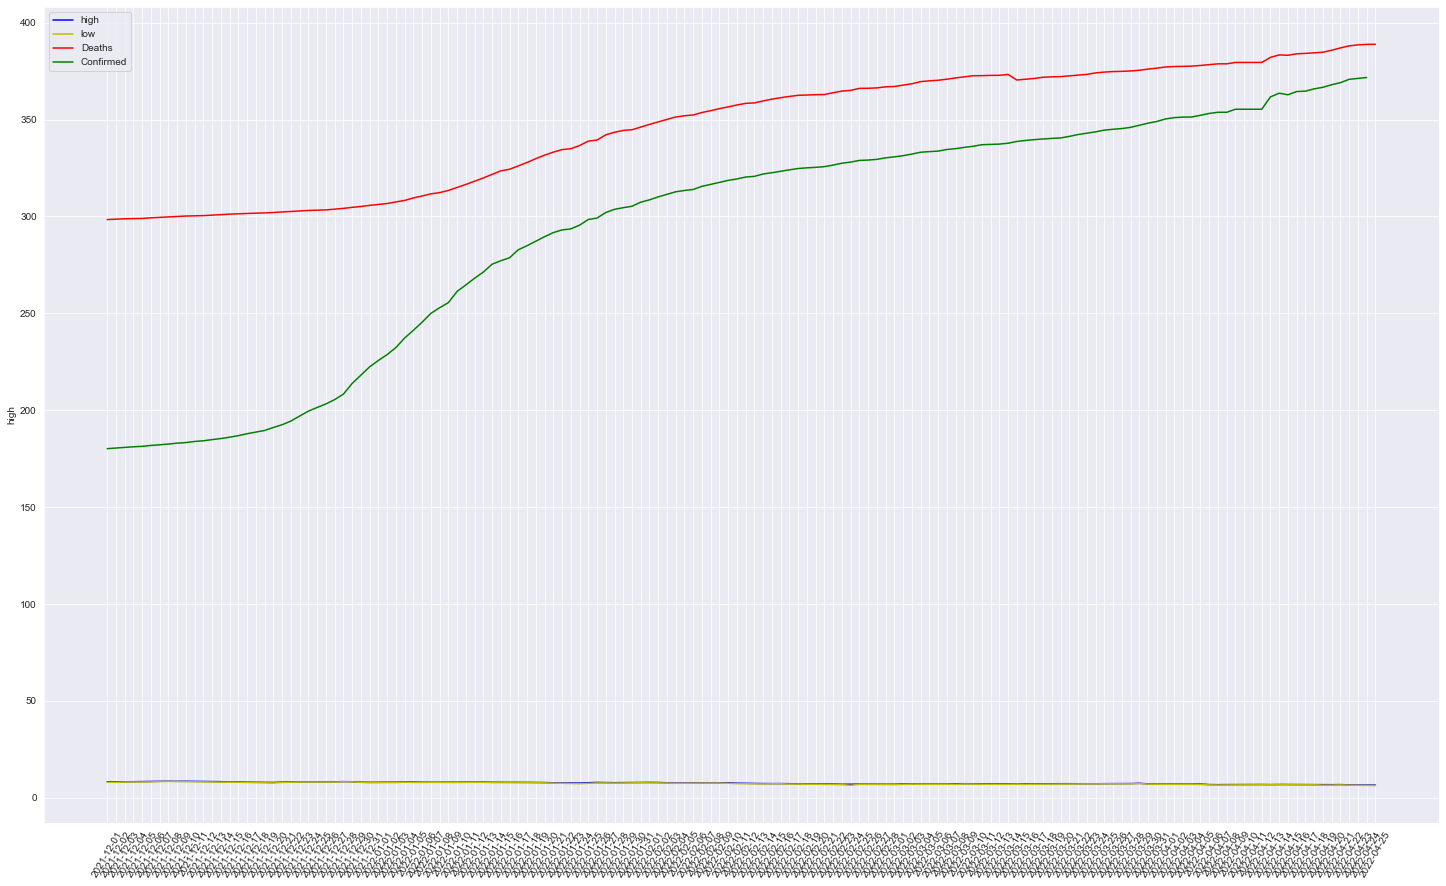

In [64]:
fig4, ax4 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_nly,
    x=deaths_vs_nly.index.astype(str),
    y=deaths_vs_nly['high'],
    color='b',
    label='high',
    ax=ax4
)
sns.lineplot(
    data=deaths_vs_nly,
    x=deaths_vs_nly.index.astype(str),
    y=deaths_vs_nly['low'],
    color='y',
    label='low',
    ax=ax4
)
sns.lineplot(
    data=deaths_vs_nly,
    x=deaths_vs_nly.index.astype(str),
    y=deaths_vs_nly['Deaths'],
    color='r',
    label='Deaths',
    ax=ax4
)
sns.lineplot(
    data=confirmed_vs_nly,
    x=confirmed_vs_nly.index.astype(str),
    y=confirmed_vs_nly['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax4
)
ax4.tick_params(axis='x', rotation=60)

### GOLD vs Deaths vs Confirmed cases

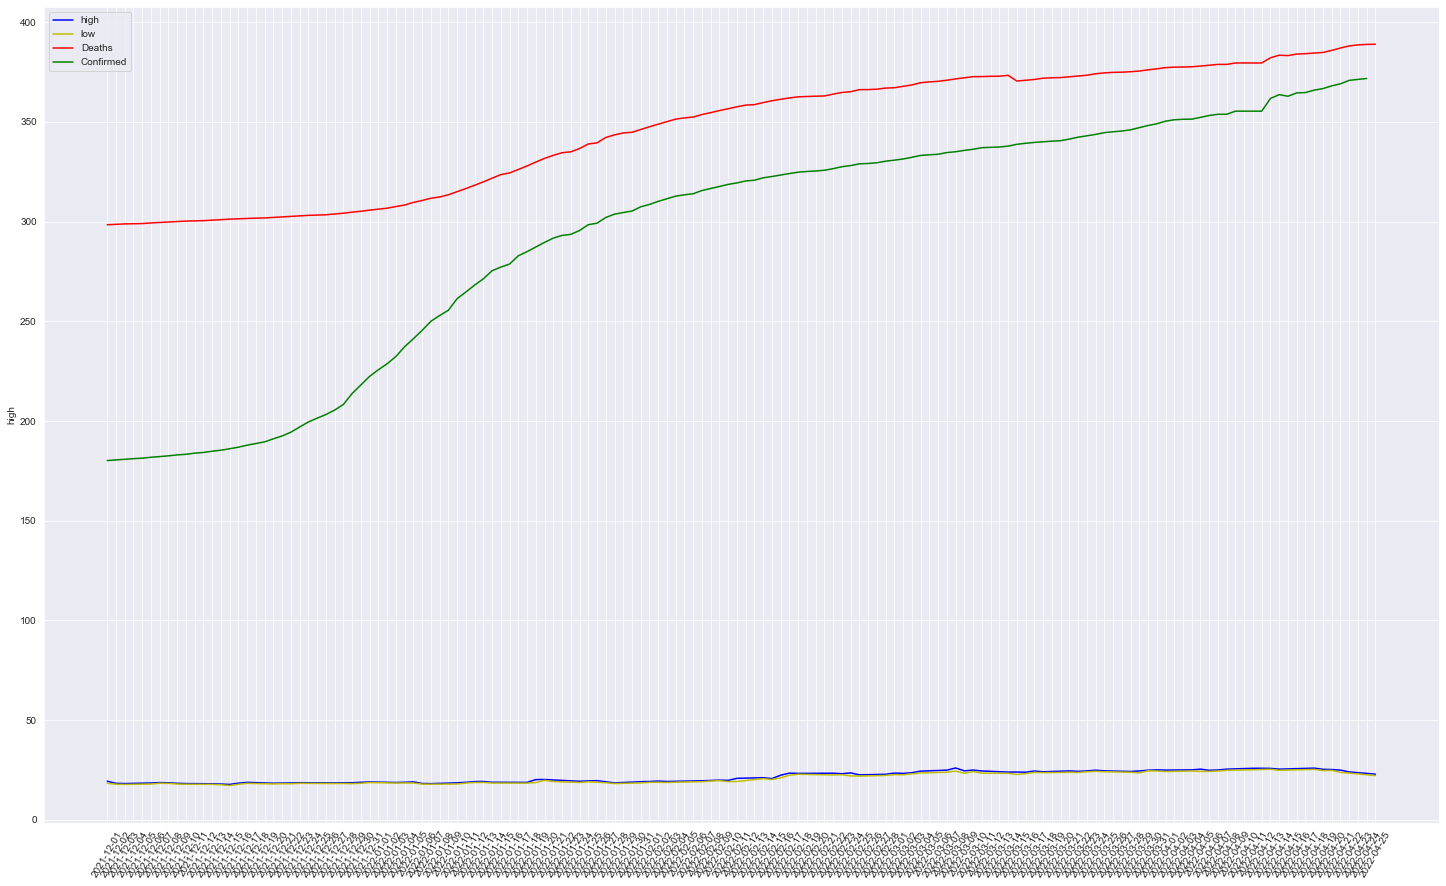

In [65]:
fig5, ax5 = plt.subplots(figsize=(25, 15))
sns.lineplot(
    data=deaths_vs_gld,
    x=deaths_vs_gld.index.astype(str),
    y=deaths_vs_gld['high'],
    color='b',
    label='high',
    ax=ax5
)
sns.lineplot(
    data=deaths_vs_gld,
    x=deaths_vs_gld.index.astype(str),
    y=deaths_vs_gld['low'],
    color='y',
    label='low',
    ax=ax5
)
sns.lineplot(
    data=deaths_vs_gld,
    x=deaths_vs_gld.index.astype(str),
    y=deaths_vs_gld['Deaths'],
    color='r',
    label='Deaths',
    ax=ax5
)
sns.lineplot(
    data=confirmed_vs_gld,
    x=confirmed_vs_gld.index.astype(str),
    y=confirmed_vs_gld['Confirmed'],
    color='g',
    label='Confirmed',
    ax=ax5
)
ax5.tick_params(axis='x', rotation=60)

In [11]:
# Creating Date as default index
spy_tp_df.rename_axis('Date', inplace=True)

# Printing one Datasets
spy_tp_df.head(5)

,high,low
Date,,
2022-04-25,428.6900,418.84
2022-04-22,438.0825,425.44
2022-04-21,450.0100,437.10
2022-04-20,447.5700,443.48
2022-04-19,445.8000,437.68


### Importing Covid Deaths Dataset

In [12]:
# Importing COVID Deaths data from CSV
deaths_data = pd.read_csv(d_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
deaths_data['Date'] = pd.to_datetime(deaths_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Deaths data such that value is at position 1.
deaths_data['Date'] = deaths_data['Date'].values[::-1].astype(str)
deaths_data['Deaths'] = deaths_data['Deaths'].values[::-1]

# Assigning Date as default index
deaths_data.set_index('Date', inplace=True)

# Number of Deaths is in multiples of 10k we will have to divide it such that the visuals can correlate each other.
deaths_data['Deaths'] = deaths_data['Deaths'].div(100)

# Printing Dataframe
deaths_data

,Deaths
Date,
2022-04-25,388.85
2022-04-24,388.78
2022-04-23,388.53
2022-04-22,388.01
2022-04-21,386.96
...,...
2021-12-05,298.96
2021-12-04,298.89
2021-12-03,298.80


### Importing covid Confirmed Dataset

In [13]:
# Importing COVID confirmed cases data from CSV
confirmed_data = pd.read_csv(c_address, index_col=False)

# Formatting the date as YYYY-MM-dddd format
confirmed_data['Date'] = pd.to_datetime(confirmed_data['Date']).dt.strftime('%Y-%m-%d')

# Reversing the order of both Dates and Confirmed cases data such that value is at position 1.
confirmed_data['Date'] = confirmed_data['Date'].values[::-1].astype(str)
confirmed_data['Confirmed'] = confirmed_data['Confirmed'].values[::-1]

# Assigning Date as default index
confirmed_data.set_index('Date', inplace=True)

# Number of Confirmed cases is in multiples of 10k we will have to divide it such that the visuals can correlate each other.
confirmed_data['Confirmed'] = confirmed_data['Confirmed'].div(100)

# Printing Dataframe
confirmed_data

,Confirmed
Date,
2022-04-24,388.78
2022-04-23,388.53
2022-04-22,388.01
2022-04-21,386.96
2022-04-20,385.76
...,...
2021-12-05,298.96
2021-12-04,298.89
2021-12-03,298.80
